# Analisis Banjir - Lingga Aji Andika

## 1. Import Package

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import collections
# from pygooglenews import GoogleNews
import datetime
from collections import Counter
from wordcloud import WordCloud
# import tweepy
# from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
# from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
# import nltk

## 2. Import dataset

In [23]:
#List semua dataset selama 3 Tahun Kebelakang dengan link langsung
lst_data = [
            'https://data.jakarta.go.id/dataset/26ae6b299f962843c7e67e5e6421218b/resource/caf1c2f6d362a0dfb31107b5ad8a2d30/download/Data-Kejadian-Bencana-Banjir-di-Provinsi-DKI-Jakarta-Tahun-2020-Bulan-November.csv',
            'https://data.jakarta.go.id/dataset/26ae6b299f962843c7e67e5e6421218b/resource/616a219e6e41fe009713b0b4d45d4c57/download/Data-Kejadian-Bencana-Banjir-di-Provinsi-DKI-Jakarta-Tahun-2020-Bulan-Oktober.csv',
            'https://data.jakarta.go.id/dataset/26ae6b299f962843c7e67e5e6421218b/resource/15b387b250e1dbf04f7384ca3dde945a/download/Data-Kejadian-Bencana-Banjir-di-Provinsi-DKI-Jakarta-Tahun-2020-Bulan-September.csv',
            'https://data.jakarta.go.id/dataset/26ae6b299f962843c7e67e5e6421218b/resource/d2280ec40f970e004c9f29644a41900c/download/Data-Kejadian-Bencana-Banjir-di-Provinsi-DKI-Jakarta-Tahun-2020-Bulan-Agustus.csv',
            'https://data.jakarta.go.id/dataset/26ae6b299f962843c7e67e5e6421218b/resource/e3299fa5cf7de35a393a3ef317743e07/download/Data-Kejadian-Bencana-Banjir-di-Provinsi-DKI-Jakarta-Tahun-2020-Bulan-Juli.csv',
            'https://data.jakarta.go.id/dataset/26ae6b299f962843c7e67e5e6421218b/resource/3b79c2944f6214d0dbf4bc6c3d63cbc7/download/Data-Kejadian-Bencana-Banjir-di-Provinsi-DKI-Jakarta-Tahun-2020-Bulan-Juni.csv',
            'https://data.jakarta.go.id/dataset/26ae6b299f962843c7e67e5e6421218b/resource/e67258aa002d4ee52a8bc64421c1e4b3/download/Data-Kejadian-Bencana-Banjir-di-Provinsi-DKI-Jakarta-Tahun-2020-Bulan-Mei.csv',
            'https://data.jakarta.go.id/dataset/26ae6b299f962843c7e67e5e6421218b/resource/445d265ac4bee1024909b1eb49170617/download/Data-Kejadian-Bencana-Banjir-di-Provinsi-DKI-Jakarta-Tahun-2020-Bulan-April.csv',
            'https://data.jakarta.go.id/dataset/26ae6b299f962843c7e67e5e6421218b/resource/2cfae39074177810714d4923dd6c6092/download/Data-Kejadian-Bencana-Banjir-di-Provinsi-DKI-Jakarta-Tahun-2020-Bulan-Maret.csv',
            'https://data.jakarta.go.id/dataset/26ae6b299f962843c7e67e5e6421218b/resource/fb9cc34edc46e7bcdf78b1a2df05ebf6/download/Data-Kejadian-Bencana-Banjir-di-Provinsi-DKI-Jakarta-Tahun-2020-Bulan-Februari.csv',
            'https://data.jakarta.go.id/dataset/26ae6b299f962843c7e67e5e6421218b/resource/22b62d11e65072196c385de24b570d6f/download/Data-Kejadian-Bencana-Banjir-di-Provinsi-DKI-Jakarta-Tahun-2020-Bulan-Januari.csv',
            'https://data.jakarta.go.id/dataset/abca1a42684e312a8fd0acd88b3f91e6/resource/92070a1b53d80d29af7e26d5f555625a/download/Data-Kejadian-Bencana-Banjir-di-Provinsi-DKI-Jakarta-Tahun-2019-Bulan-Desember.csv',
            'https://data.jakarta.go.id/dataset/abca1a42684e312a8fd0acd88b3f91e6/resource/b64f1b95d9a126e9f77e4a752587fa0a/download/Data-Kejadian-Bencana-Banjir-di-Provinsi-DKI-Jakarta-Tahun-2019-Bulan-Oktober.csv',
            'https://data.jakarta.go.id/dataset/abca1a42684e312a8fd0acd88b3f91e6/resource/41bd40b5e65c3f22ca3e09cf0cbf7218/download/Data-Kejadian-Bencana-Banjir-di-Provinsi-DKI-Jakarta-Tahun-2019-Bulan-Mei.csv',
            'https://data.jakarta.go.id/dataset/abca1a42684e312a8fd0acd88b3f91e6/resource/2f42f428b16adf5234f11ca91a52d1bf/download/Data-Kejadian-Bencana-Banjir-di-Provinsi-DKI-Jakarta-Tahun-2019-Bulan-April.csv',
            'https://data.jakarta.go.id/dataset/abca1a42684e312a8fd0acd88b3f91e6/resource/08dd02f2deaf39f00ae67439b3227d99/download/Data-Kejadian-Bencana-Banjir-di-Provinsi-DKI-Jakarta-Tahun-2019-Bulan-Maret.csv',
            'https://data.jakarta.go.id/dataset/abca1a42684e312a8fd0acd88b3f91e6/resource/5bd1864855594796f2414e2db3488b0d/download/Data-Kejadian-Bencana-Banjir-di-Provinsi-DKI-Jakarta-Tahun-2019-Bulan-Februari.csv',
            'https://data.jakarta.go.id/dataset/abca1a42684e312a8fd0acd88b3f91e6/resource/a0756135d0e9a9ddd87eb06db686b119/download/Data-Kejadian-Bencana-Banjir-di-Provinsi-DKI-Jakarta-Tahun-2019-Bulan-Januari.csv',
            'https://data.jakarta.go.id/dataset/1facf7799ef76152a0bfdc64b466b055/resource/718162a0df0f7f9be1dabcbe1b010652/download/Data-Kejadian-Bencana-Banjir-di-Provinsi-DKI-Jakarta-Tahun-2018-Bulan-Desember.csv',
            'https://data.jakarta.go.id/dataset/1facf7799ef76152a0bfdc64b466b055/resource/e42279ae2c953398ea50d2df9118c71c/download/Data-Kejadian-Bencana-Banjir-di-Provinsi-DKI-Jakarta-Tahun-2018-Bulan-November.csv',
            'https://data.jakarta.go.id/dataset/1facf7799ef76152a0bfdc64b466b055/resource/88a48c52ab5599a7bb7c168bc0854803/download/Data-Kejadian-Bencana-Banjir-di-Provinsi-DKI-Jakarta-Tahun-2018-Bulan-Oktober.csv',
            'https://data.jakarta.go.id/dataset/1facf7799ef76152a0bfdc64b466b055/resource/e3ae1aff5a75780d1c48c73c1d35774c/download/Data-Kejadian-Bencana-Banjir-di-Provinsi-DKI-Jakarta-Tahun-2018-Bulan-Juni.csv',
            'https://data.jakarta.go.id/dataset/1facf7799ef76152a0bfdc64b466b055/resource/0abdf677d6cc2c6c839f99cd28a57ce4/download/Data-Kejadian-Bencana-Banjir-di-Provinsi-DKI-Jakarta-Tahun-2018-Bulan-Mei.csv',
            'https://data.jakarta.go.id/dataset/1facf7799ef76152a0bfdc64b466b055/resource/6b5e762850b158f27f61860d86cb6746/download/Data-Kejadian-Bencana-Banjir-di-Provinsi-DKI-Jakarta-Tahun-2018-Bulan-April.csv',
            'https://data.jakarta.go.id/dataset/1facf7799ef76152a0bfdc64b466b055/resource/4303c72d172df6c6c7caf496fb745305/download/Data-Kejadian-Bencana-Banjir-di-Provinsi-DKI-Jakarta-Tahun-2018-Bulan-Maret.csv',
            'https://data.jakarta.go.id/dataset/1facf7799ef76152a0bfdc64b466b055/resource/6041bf4559a4c529c143ddc5614b702d/download/Data-Kejadian-Bencana-Banjir-di-Provinsi-DKI-Jakarta-Tahun-2018-Bulan-Februari.csv',
            'https://data.jakarta.go.id/dataset/1facf7799ef76152a0bfdc64b466b055/resource/6d3b9857ad7957e95a6c7caa2db10ad9/download/Data-Kejadian-Bencana-Banjir-di-Provinsi-DKI-Jakarta-Tahun-2018-Bulan-Januari.csv'
            ]

In [24]:
# 'https://data.jakarta.go.id/dataset/d30b0dade27a45b2d452a6ce72af3542/resource/bb36d333b185ca6013a097b8906a9a81/download/Data-Kejadian-Bencana-Banjir-di-Provinsi-DKI-Jakarta-Tahun-2017-Bulan-Desember.csv',
#             'https://data.jakarta.go.id/dataset/d30b0dade27a45b2d452a6ce72af3542/resource/ad4c67d99c2ed71215a0067df9e3e3d2/download/Data-Kejadian-Bencana-Banjir-di-Provinsi-DKI-Jakarta-Tahun-2017-Bulan-November.csv',
#             'https://data.jakarta.go.id/dataset/d30b0dade27a45b2d452a6ce72af3542/resource/fb52011608cb933ea2aac365efa5b70b/download/Data-Kejadian-Bencana-Banjir-di-Provinsi-DKI-Jakarta-Tahun-2017-Bulan-Oktober.csv',
#             'https://data.jakarta.go.id/dataset/d30b0dade27a45b2d452a6ce72af3542/resource/893827a58f8a9e28c7f0f1a096c8d097/download/Data-Kejadian-Bencana-Banjir-di-Provinsi-DKI-Jakarta-Tahun-2017-Bulan-September.csv',
#             'https://data.jakarta.go.id/dataset/d30b0dade27a45b2d452a6ce72af3542/resource/0a62870a70945ff27190da913ab7d104/download/Data-Kejadian-Bencana-Banjir-di-Provinsi-DKI-Jakarta-Tahun-2017-Bulan-Agustus.csv',
#             'https://data.jakarta.go.id/dataset/d30b0dade27a45b2d452a6ce72af3542/resource/4c9a91981ae0c6b7b5ecfd00e9d60a1a/download/Data-Kejadian-Bencana-Banjir-di-Provinsi-DKI-Jakarta-Tahun-2017-Bulan-Juli.csv',
#             'https://data.jakarta.go.id/dataset/d30b0dade27a45b2d452a6ce72af3542/resource/dfe5830ec43f620c023510ff5fd653d2/download/Data-Kejadian-Bencana-Banjir-di-Provinsi-DKI-Jakarta-Tahun-2017-Bulan-Juni.csv',
#             'https://data.jakarta.go.id/dataset/d30b0dade27a45b2d452a6ce72af3542/resource/c8ea42525ddcda2ae21667dd8991a6ee/download/Data-Kejadian-Bencana-Banjir-di-Provinsi-DKI-Jakarta-Tahun-2017-Bulan-Mei.csv',
#             'https://data.jakarta.go.id/dataset/d30b0dade27a45b2d452a6ce72af3542/resource/72d6cc41da2064fe667e189a06e062f7/download/Data-Kejadian-Bencana-Banjir-di-Provinsi-DKI-Jakarta-Tahun-2017-Bulan-April.csv',
#             'https://data.jakarta.go.id/dataset/d30b0dade27a45b2d452a6ce72af3542/resource/81a569b2d0243139fb9282346a99711e/download/Data-Kejadian-Bencana-Banjir-di-Provinsi-DKI-Jakarta-Tahun-2017-Bulan-Maret.csv',
#             'https://data.jakarta.go.id/dataset/d30b0dade27a45b2d452a6ce72af3542/resource/8a5abb784e42b781babc52ee0a6a3a33/download/Data-Kejadian-Bencana-Banjir-di-Provinsi-DKI-Jakarta-Tahun-2017-Bulan-Februari.csv',
#             'https://data.jakarta.go.id/dataset/d30b0dade27a45b2d452a6ce72af3542/resource/dec0ed93d630cacb6fb169f025ca0c55/download/Data-Kejadian-Bencana-Banjir-di-Provinsi-DKI-Jakarta-Tahun-2017-Bulan-Januari.csv'

In [25]:
#base dataset Desember 2020
df_base = pd.read_csv('https://data.jakarta.go.id/dataset/26ae6b299f962843c7e67e5e6421218b/resource/6cb85e9949ee90c7a23a5bf3a45a2591/download/Data-Kejadian-Bencana-Banjir-di-Provinsi-DKI-Jakarta-Tahun-2020-Bulan-Desember.csv')
df_base['Tahun'] = '2020'
df_base['Bulan'] = 'Desember'

In [26]:
df_base.head()

,kota_administrasi,kecamatan,kelurahan,rw,jumlah_terdampak_rw,jumlah_terdampak_rt,jumlah_terdampak_kk,jumlah_terdampak_jiwa,ketinggian_air,tanggal_kejadian,lama_genangan,jumlah_meninggal,jumlah_hilang,jumlah_luka_berat,jumlah_luka_ringan,jumlah_pengungsi_tertinggi,jumlah_tempat_pengungsian,nilai_kerugian,Tahun,Bulan
0,Jakarta Barat,KEBON JERUK,KEDOYA UTARA,RW : 002,1,1,0,0,20 cm,2020-12-07,0,0,0,0,0,0,0,0,2020,Desember
1,Jakarta Barat,KEMBANGAN,SRENGSENG,RW : 008,1,1,0,0,25 cm,2020-12-31,0,0,0,0,0,0,0,0,2020,Desember
2,Jakarta Barat,KEMBANGAN,SRENGSENG,0,0,1,0,0,30 cm,2020-12-31,0,0,0,0,0,0,0,0,2020,Desember
3,Jakarta Barat,KEMBANGAN,SRENGSENG,0,0,1,0,0,30 cm,2020-12-31,0,0,0,0,0,0,0,0,2020,Desember
4,Jakarta Selatan,PASAR MINGGU,PEJATEN TIMUR,RW : 005,1,1,25,70,40 cm,2020-12-06,0,0,0,0,0,0,0,0,2020,Desember


## 3. Preprocessing Dataset

In [27]:
#concate semua dataset
for i in range(len(lst_data)):
  data = pd.read_csv(lst_data[i])
  data['Tahun'] = lst_data[i]
  data['Tahun'] = data['Tahun'].apply(lambda st: st[st.find("Tahun-")+6:st.find("-Bulan")]).astype(int)
  data['Bulan'] = lst_data[i]
  data['Bulan'] = data['Bulan'].apply(lambda st: st[st.find("Bulan-")+6:st.find(".csv")])
  df_base = pd.concat([df_base, data])
  i+1

In [28]:
# fungsi membersihkan bulan
def processkata(kata):
    replace_jan = ['Januari']
    kata = re.sub(r'|'.join(map(re.escape, replace_jan)), '1', kata)
    replace_feb = ['Februari']
    kata = re.sub(r'|'.join(map(re.escape, replace_feb)), '2', kata)
    replace_maret = ['Maret']
    kata = re.sub(r'|'.join(map(re.escape, replace_maret)), '3', kata)
    replace_aprl = ['April']
    kata = re.sub(r'|'.join(map(re.escape, replace_aprl)), '4', kata)
    replace_mei = ['Mei']
    kata = re.sub(r'|'.join(map(re.escape, replace_mei)), '5', kata)
    replace_jun = ['Juni']
    kata = re.sub(r'|'.join(map(re.escape, replace_jun)), '6', kata)
    replace_jul = ['Juli']
    kata = re.sub(r'|'.join(map(re.escape, replace_jul)), '7', kata)
    replace_ags = ['Agustus']
    kata = re.sub(r'|'.join(map(re.escape, replace_ags)), '8', kata)
    replace_sep = ['September']
    kata = re.sub(r'|'.join(map(re.escape, replace_sep)), '9', kata)
    replace_okt = ['Oktober']
    kata = re.sub(r'|'.join(map(re.escape, replace_okt)), '10', kata)
    replace_nov = ['November']
    kata = re.sub(r'|'.join(map(re.escape, replace_nov)), '11', kata)
    replace_des = ['Desember']
    kata = re.sub(r'|'.join(map(re.escape, replace_des)), '12', kata)
    return kata

In [29]:
#implementasi fungsi sebelumnya
df_base['Bulan'] = df_base['Bulan'].apply(processkata).astype(int)

In [30]:
df_base['Tahun']

0    2020
1    2020
2    2020
3    2020
4    2020
     ... 
3    2018
4    2018
5    2018
6    2018
7    2018
Name: Tahun, Length: 1308, dtype: object

In [31]:
# fungsi pembersihan kelurahan
def processkelurahan(kata):
    replace_jan = ['KEL. ']
    kata = re.sub(r'|'.join(map(re.escape, replace_jan)), '', kata)
    return kata

In [32]:
# Implementasi fungsi sebelumnya
df_base['kelurahan'] = df_base['kelurahan'].apply(processkelurahan)

In [33]:
df_base

,kota_administrasi,kecamatan,kelurahan,rw,jumlah_terdampak_rw,jumlah_terdampak_rt,jumlah_terdampak_kk,jumlah_terdampak_jiwa,ketinggian_air,tanggal_kejadian,lama_genangan,jumlah_meninggal,jumlah_hilang,jumlah_luka_berat,jumlah_luka_ringan,jumlah_pengungsi_tertinggi,jumlah_tempat_pengungsian,nilai_kerugian,Tahun,Bulan
0,Jakarta Barat,KEBON JERUK,KEDOYA UTARA,RW : 002,1,1,0,0,20 cm,2020-12-07,0,0,0,0,0,0,0,0,2020,12
1,Jakarta Barat,KEMBANGAN,SRENGSENG,RW : 008,1,1,0,0,25 cm,2020-12-31,0,0,0,0,0,0,0,0,2020,12
2,Jakarta Barat,KEMBANGAN,SRENGSENG,0,0,1,0,0,30 cm,2020-12-31,0,0,0,0,0,0,0,0,2020,12
3,Jakarta Barat,KEMBANGAN,SRENGSENG,0,0,1,0,0,30 cm,2020-12-31,0,0,0,0,0,0,0,0,2020,12
4,Jakarta Selatan,PASAR MINGGU,PEJATEN TIMUR,RW : 005,1,1,25,70,40 cm,2020-12-06,0,0,0,0,0,0,0,0,2020,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,Jakarta Utara,GROGOL PETAMBURAN,JELAMBAR,7,1,1,0,0,20 cm,tgl. 03,0,0,0,0,0,0,0,0,2018,1
4,Jakarta Utara,KEMBANGAN,KEMBANGAN UTARA,"3, 4, 5, 6",4,2,0,0,5 s/d 20 cm,tgl. 18,0,0,0,0,0,0,0,0,2018,1
5,Jakarta Utara,CENGKARENG,KAPUK,"02, 05, 06, 07, 09, 12, 13, 15, 16",9,21,0,0,5 s/d 30 cm,tgl. 18,0,0,0,0,0,0,0,0,2018,1
6,Jakarta Utara,CENGKARENG,RAWA BUAYA,"01, 02",2,1,0,0,15 s/d 20 cm,tgl. 18,0,0,0,0,0,0,0,0,2018,1


In [34]:
#dataset yang sudah dibersihkan
df_base.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1308 entries, 0 to 7
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   kota_administrasi           1308 non-null   object
 1   kecamatan                   1308 non-null   object
 2   kelurahan                   1308 non-null   object
 3   rw                          1308 non-null   object
 4   jumlah_terdampak_rw         1308 non-null   int64 
 5   jumlah_terdampak_rt         1308 non-null   int64 
 6   jumlah_terdampak_kk         1308 non-null   object
 7   jumlah_terdampak_jiwa       1308 non-null   int64 
 8   ketinggian_air              1308 non-null   object
 9   tanggal_kejadian            1308 non-null   object
 10  lama_genangan               1308 non-null   int64 
 11  jumlah_meninggal            1308 non-null   int64 
 12  jumlah_hilang               1308 non-null   int64 
 13  jumlah_luka_berat           1308 non-null   int64 


In [35]:
df_base

,kota_administrasi,kecamatan,kelurahan,rw,jumlah_terdampak_rw,jumlah_terdampak_rt,jumlah_terdampak_kk,jumlah_terdampak_jiwa,ketinggian_air,tanggal_kejadian,lama_genangan,jumlah_meninggal,jumlah_hilang,jumlah_luka_berat,jumlah_luka_ringan,jumlah_pengungsi_tertinggi,jumlah_tempat_pengungsian,nilai_kerugian,Tahun,Bulan
0,Jakarta Barat,KEBON JERUK,KEDOYA UTARA,RW : 002,1,1,0,0,20 cm,2020-12-07,0,0,0,0,0,0,0,0,2020,12
1,Jakarta Barat,KEMBANGAN,SRENGSENG,RW : 008,1,1,0,0,25 cm,2020-12-31,0,0,0,0,0,0,0,0,2020,12
2,Jakarta Barat,KEMBANGAN,SRENGSENG,0,0,1,0,0,30 cm,2020-12-31,0,0,0,0,0,0,0,0,2020,12
3,Jakarta Barat,KEMBANGAN,SRENGSENG,0,0,1,0,0,30 cm,2020-12-31,0,0,0,0,0,0,0,0,2020,12
4,Jakarta Selatan,PASAR MINGGU,PEJATEN TIMUR,RW : 005,1,1,25,70,40 cm,2020-12-06,0,0,0,0,0,0,0,0,2020,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,Jakarta Utara,GROGOL PETAMBURAN,JELAMBAR,7,1,1,0,0,20 cm,tgl. 03,0,0,0,0,0,0,0,0,2018,1
4,Jakarta Utara,KEMBANGAN,KEMBANGAN UTARA,"3, 4, 5, 6",4,2,0,0,5 s/d 20 cm,tgl. 18,0,0,0,0,0,0,0,0,2018,1
5,Jakarta Utara,CENGKARENG,KAPUK,"02, 05, 06, 07, 09, 12, 13, 15, 16",9,21,0,0,5 s/d 30 cm,tgl. 18,0,0,0,0,0,0,0,0,2018,1
6,Jakarta Utara,CENGKARENG,RAWA BUAYA,"01, 02",2,1,0,0,15 s/d 20 cm,tgl. 18,0,0,0,0,0,0,0,0,2018,1


In [36]:
# drop data yabg tidak dipakai
df = df_base.drop(['rw','tanggal_kejadian',
       'lama_genangan', 'jumlah_meninggal', 'jumlah_hilang',
       'jumlah_luka_berat', 'jumlah_luka_ringan', 'jumlah_pengungsi_tertinggi',
       'jumlah_tempat_pengungsian', 'nilai_kerugian'], axis = 1)

In [37]:
# pembersiahn data ketinggian air
df['min_ketinggian'] = df['ketinggian_air'].str[:2].astype(int)
df['max_ketinggian'] = df['ketinggian_air'].str[2:]
df['max_ketinggian'] = df['max_ketinggian'].str.extract('(\d+)')
df['max_ketinggian'] = df['max_ketinggian'].fillna(df['min_ketinggian']).astype(int)
df['avg_ketinggian'] = (df['min_ketinggian']+df['max_ketinggian'])/2

In [38]:
df = df.drop(['ketinggian_air'], axis = 1)

In [39]:
df

,kota_administrasi,kecamatan,kelurahan,jumlah_terdampak_rw,jumlah_terdampak_rt,jumlah_terdampak_kk,jumlah_terdampak_jiwa,Tahun,Bulan,min_ketinggian,max_ketinggian,avg_ketinggian
0,Jakarta Barat,KEBON JERUK,KEDOYA UTARA,1,1,0,0,2020,12,20,20,20.0
1,Jakarta Barat,KEMBANGAN,SRENGSENG,1,1,0,0,2020,12,25,25,25.0
2,Jakarta Barat,KEMBANGAN,SRENGSENG,0,1,0,0,2020,12,30,30,30.0
3,Jakarta Barat,KEMBANGAN,SRENGSENG,0,1,0,0,2020,12,30,30,30.0
4,Jakarta Selatan,PASAR MINGGU,PEJATEN TIMUR,1,1,25,70,2020,12,40,40,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3,Jakarta Utara,GROGOL PETAMBURAN,JELAMBAR,1,1,0,0,2018,1,20,20,20.0
4,Jakarta Utara,KEMBANGAN,KEMBANGAN UTARA,4,2,0,0,2018,1,5,20,12.5
5,Jakarta Utara,CENGKARENG,KAPUK,9,21,0,0,2018,1,5,30,17.5
6,Jakarta Utara,CENGKARENG,RAWA BUAYA,2,1,0,0,2018,1,15,20,17.5


In [40]:
#Agregating atau grouing data
df['tanggal'] = df['Tahun'].astype(str) +'-'+df['Bulan'].astype(str)
df['tanggal'] = pd.to_datetime(df['tanggal']).dt.strftime('%Y-%m')

df1 = df.groupby(by=['tanggal','kelurahan'], dropna=False).agg({'avg_ketinggian':'mean','jumlah_terdampak_jiwa':'sum'}).reset_index()

In [41]:
df1.to_csv('agregat.csv')

## 4. Exploratory Data Analysis

In [51]:
df1.describe()

,avg_ketinggian,jumlah_terdampak_jiwa
count,905.000000,905.000000
mean,41.865440,219.477348
std,28.332942,782.262834
min,1.500000,0.000000
25%,20.000000,0.000000
50%,35.000000,0.000000
75%,50.500000,15.000000
max,180.000000,13450.000000


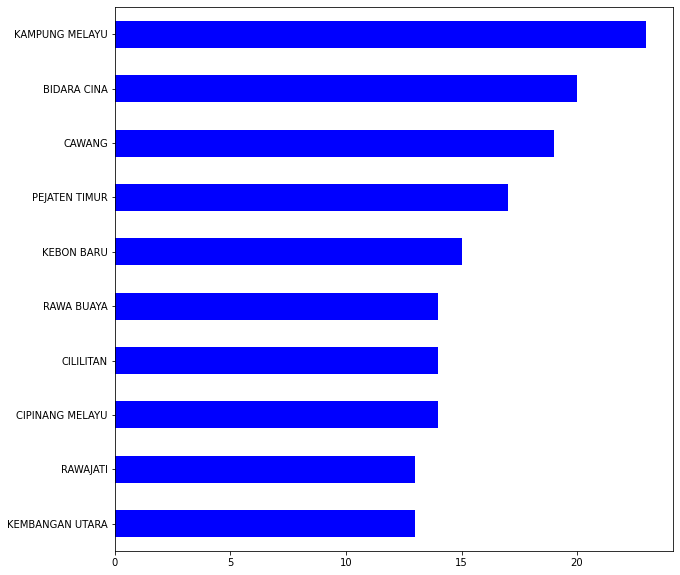

In [52]:
df1['kelurahan'].value_counts().iloc[:10].plot(kind="barh",color='blue', figsize=(10,10)).invert_yaxis()

In [53]:
df_new = df1['tanggal'].value_counts().rename_axis('tanggal').reset_index(name='counts')
df_new['tanggal'] = pd.to_datetime(df_new['tanggal'])

In [54]:
df_tgl = df_new.set_index('tanggal').sort_index().resample('MS').asfreq().fillna(0)

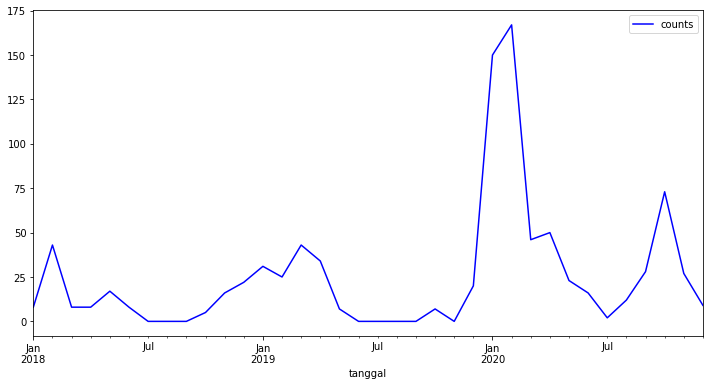

In [55]:
df_tgl.plot(kind='line',color='blue', figsize=(12,6))

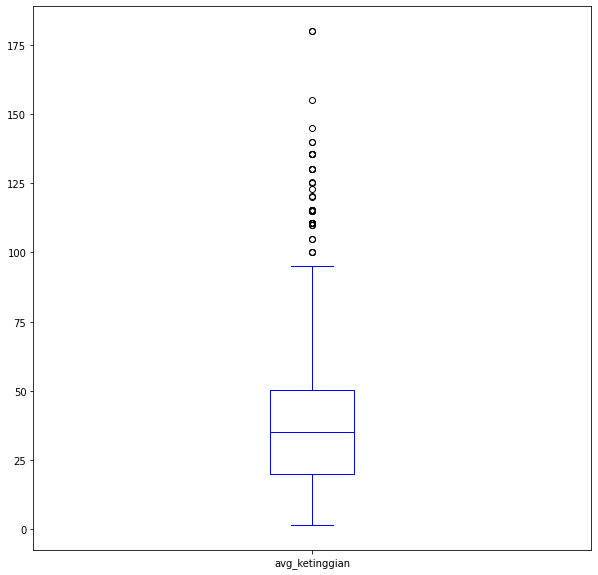

In [56]:
df1['avg_ketinggian'].plot(kind='box',color='blue', figsize=(10,10))

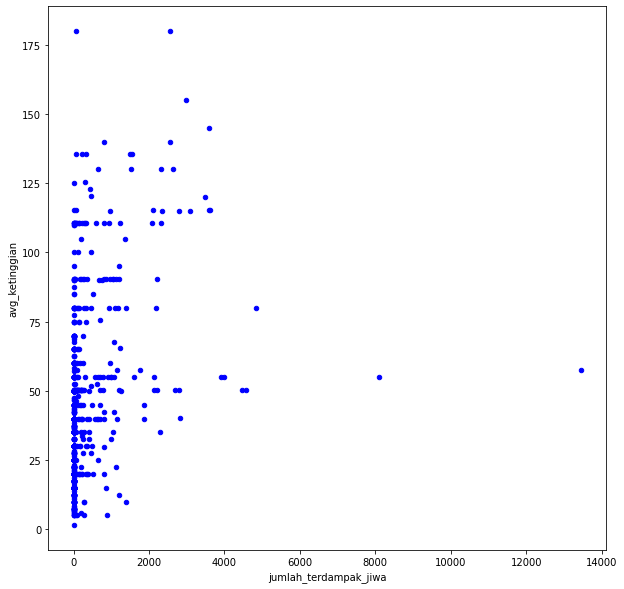

In [57]:
df1[['jumlah_terdampak_jiwa','avg_ketinggian']].plot(kind='scatter', x = 'jumlah_terdampak_jiwa', y = 'avg_ketinggian', figsize=(10,10), color = 'blue')

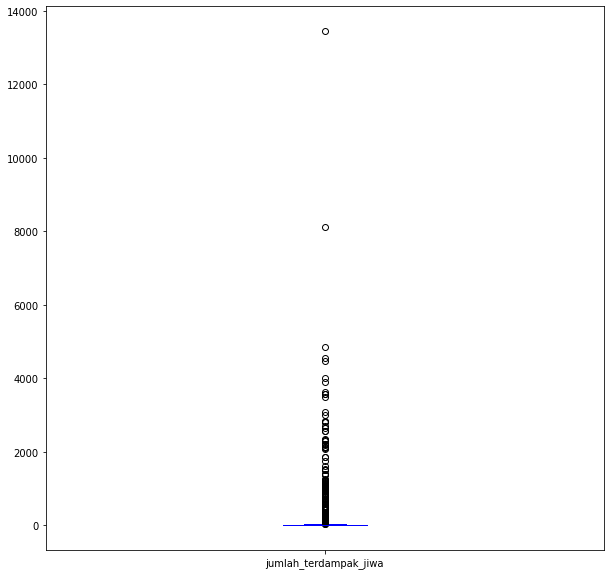

In [58]:
df1['jumlah_terdampak_jiwa'].plot(kind='box',color='blue', figsize=(10,10))

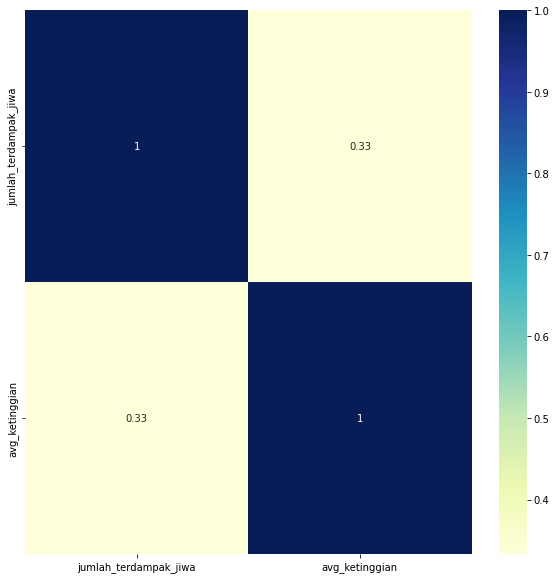

In [59]:
plt.figure(figsize=(10, 10))
sns.heatmap(df1[['jumlah_terdampak_jiwa','avg_ketinggian']].corr(), annot=True,  cmap="YlGnBu")

## 5. Modeling

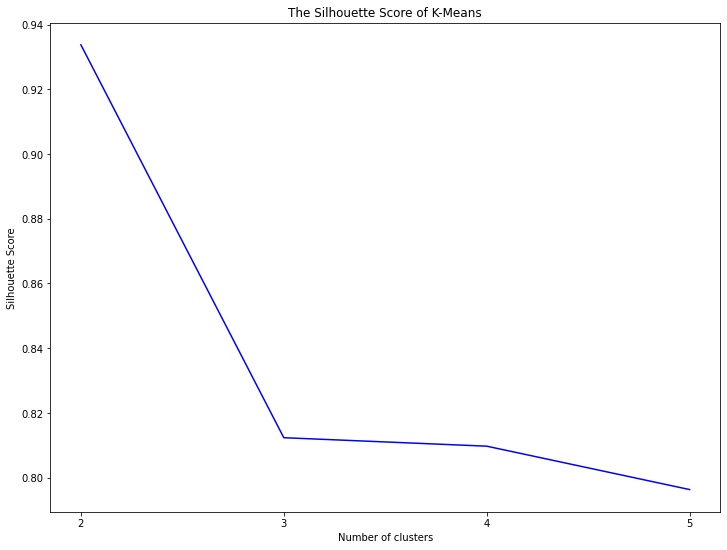

In [60]:
# Pemilihan kluster terbaik tahun 2020
df2 = df1[df1['tanggal'].str.contains('2020')]
df2 = df2.groupby(by=['kelurahan'], dropna=False).agg({'avg_ketinggian':'mean','jumlah_terdampak_jiwa':'sum'})[1:].reset_index()
df2_drop = df2.drop(['kelurahan'],axis=1)


sil_score_kmeans = []
chs_index_kmeans = []
dbs_index_kmeans = []
kmax = 5

for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(df2_drop)
    labels = kmeans.labels_
    sil_score_kmeans.append(silhouette_score(df2_drop, labels, metric = 'euclidean'))

plt.figure(figsize=(12, 9))
plt.plot(range(2,kmax+1),sil_score_kmeans,color='b')
plt.xticks(range(2,kmax+1))
plt.title('The Silhouette Score of K-Means')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

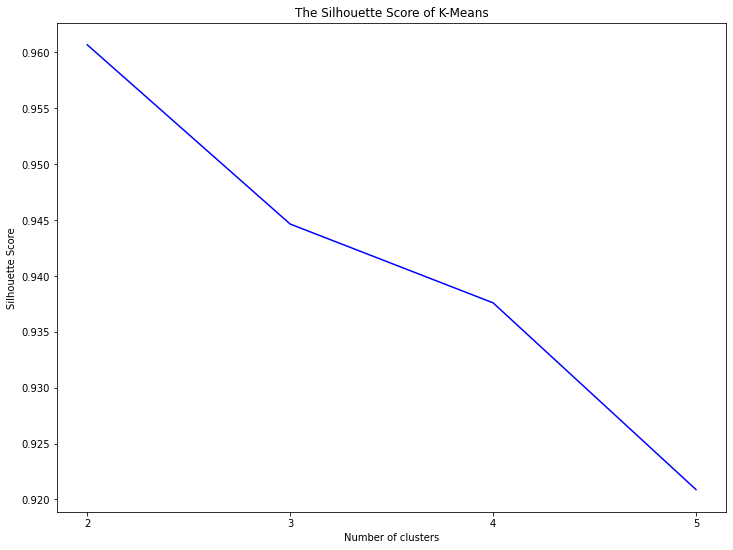

In [61]:
# Pemilihan kluster terbaik tahun 2019
df3 = df1[df1['tanggal'].str.contains('2019')]
df3 = df3.groupby(by=['kelurahan'], dropna=False).agg({'avg_ketinggian':'mean','jumlah_terdampak_jiwa':'sum'})[1:].reset_index()
df3_drop = df3.drop(['kelurahan'],axis=1)


sil_score_kmeans = []
chs_index_kmeans = []
dbs_index_kmeans = []
kmax = 5

for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(df3_drop)
    labels = kmeans.labels_
    sil_score_kmeans.append(silhouette_score(df3_drop, labels, metric = 'euclidean'))

plt.figure(figsize=(12, 9))
plt.plot(range(2,kmax+1),sil_score_kmeans,color='b')
plt.xticks(range(2,kmax+1))
plt.title('The Silhouette Score of K-Means')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

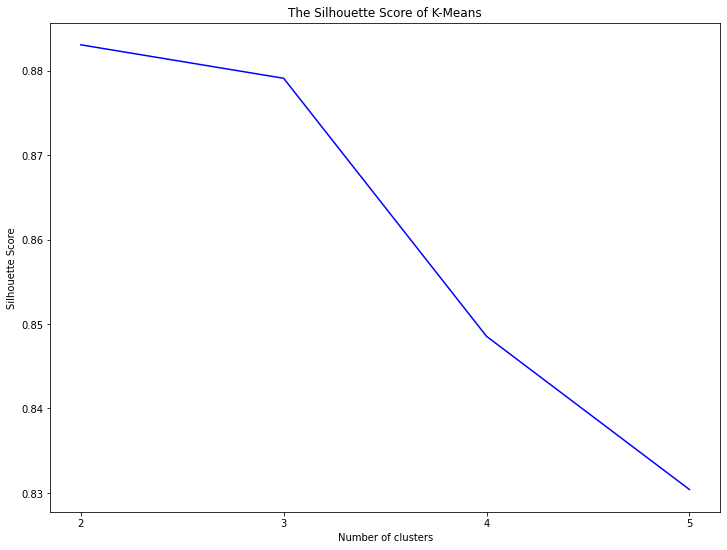

In [62]:
# Pemilihan kluster terbaik tahun 2018
df4 = df1[df1['tanggal'].str.contains('2018')]
df4 = df4.groupby(by=['kelurahan'], dropna=False).agg({'avg_ketinggian':'mean','jumlah_terdampak_jiwa':'sum'})[1:].reset_index()
df4_drop = df4.drop(['kelurahan'],axis=1)


sil_score_kmeans = []
chs_index_kmeans = []
dbs_index_kmeans = []
kmax = 5

for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(df4_drop)
    labels = kmeans.labels_
    sil_score_kmeans.append(silhouette_score(df4_drop, labels, metric = 'euclidean'))

plt.figure(figsize=(12, 9))
plt.plot(range(2,kmax+1),sil_score_kmeans,color='b')
plt.xticks(range(2,kmax+1))
plt.title('The Silhouette Score of K-Means')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

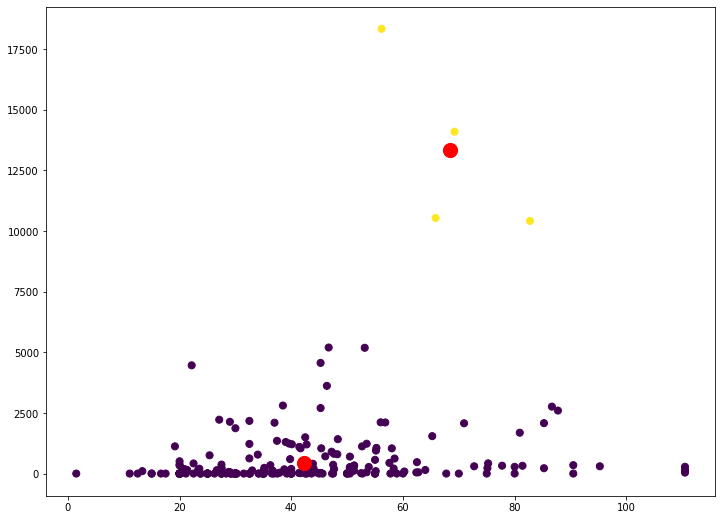

In [63]:
# K-Means clustering tahun 2020
kmeans = KMeans(n_clusters=2)
kmeans.fit(df2_drop)
y_kmeans = kmeans.predict(df2_drop)

plt.figure(figsize=(12, 9))
plt.scatter(df2_drop['avg_ketinggian'], df2_drop['jumlah_terdampak_jiwa'], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=1)

In [64]:
df2['cluster'] = pd.Series(y_kmeans, index=df2.index)

In [65]:
df2.to_csv('thn2020.csv')

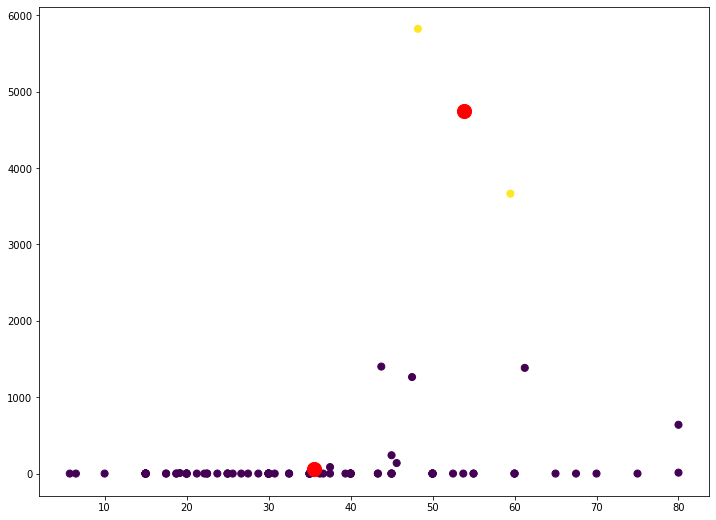

In [66]:
# K-Means clustering tahun 2019
kmeans = KMeans(n_clusters=2)
kmeans.fit(df3_drop)
y_kmeans = kmeans.predict(df3_drop)

plt.figure(figsize=(12, 9))
plt.scatter(df3_drop['avg_ketinggian'], df3_drop['jumlah_terdampak_jiwa'], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=1)

In [67]:
df3['cluster'] = pd.Series(y_kmeans, index=df3.index)

In [68]:
df3.to_csv('thn2019.csv')

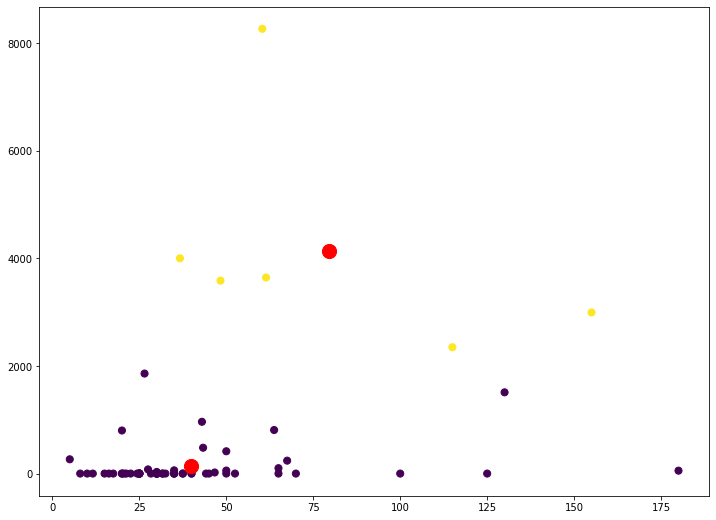

In [69]:
# K-Means clustering tahun 2018
kmeans = KMeans(n_clusters=2)
kmeans.fit(df4_drop)
y_kmeans = kmeans.predict(df4_drop)

plt.figure(figsize=(12, 9))
plt.scatter(df4_drop['avg_ketinggian'], df4_drop['jumlah_terdampak_jiwa'], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=1)

In [70]:
df4['cluster'] = pd.Series(y_kmeans, index=df4.index)

In [71]:
df4.to_csv('thn2018.csv')